In [16]:
# Operational Performance Analyst Project – End-to-End Pipeline
# Bottleneck detection via cycle time and downtime
# Pareto analysis to prioritize issues (Lean Six Sigma style)
# Operator efficiency comparison by shift
# Simulation of operational improvements (e.g., reduced downtime)
# Real-time alert simulation for cycle time/downtime thresholds
# K-Means clustering to profile machine or shift performance
# Executive summary with key insights

In [3]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import simpy
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Step 2: Load dataset
df = pd.read_csv(r"D:\JOB\5 Performance analyst\4 Operational performance analyst\operational_performance_dataset.csv")
print(df)

                timestamp process_stage machine_id    shift  units_processed  \
0     2022-01-01 00:00:00    Inspection         M2  Evening               29   
1     2022-01-01 01:00:00     Packaging         M4  Morning               21   
2     2022-01-01 02:00:00      Painting         M5  Morning               19   
3     2022-01-01 03:00:00     Packaging         M4  Morning               28   
4     2022-01-01 04:00:00     Packaging         M4    Night               20   
...                   ...           ...        ...      ...              ...   
9995  2023-02-21 11:00:00      Assembly         M4    Night               22   
9996  2023-02-21 12:00:00      Painting         M4  Evening               27   
9997  2023-02-21 13:00:00      Assembly         M2  Morning               30   
9998  2023-02-21 14:00:00    Inspection         M2  Morning               19   
9999  2023-02-21 15:00:00      Painting         M1    Night               14   

      cycle_time_sec  downtime_min  def

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


--- Bottleneck Analysis by Process Stage ---
               cycle_time_sec  downtime_min
process_stage                              
Assembly           301.634678      9.790913
Inspection         301.488861     10.086248
Painting           300.337957     10.079238
Cutting            298.958373      9.896165
Packaging          298.816602      9.982699


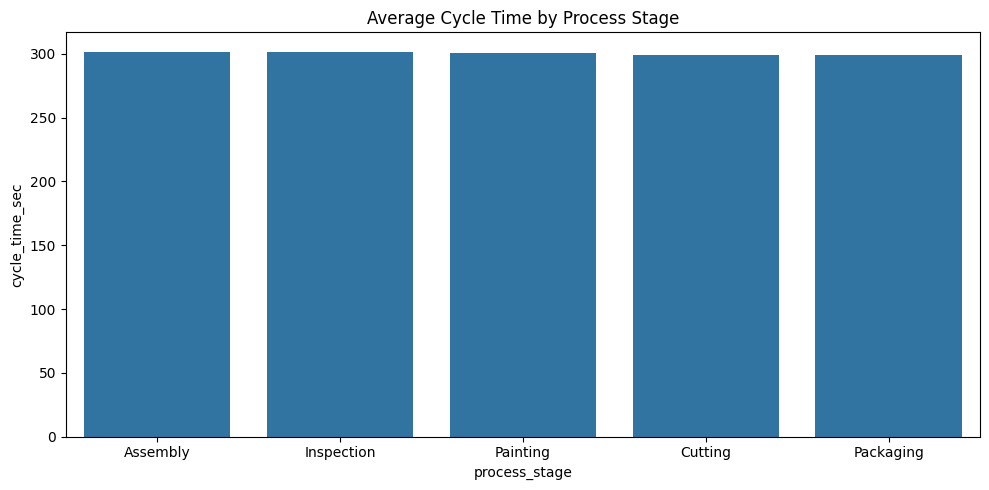

In [6]:
# Step 3: Bottleneck Detection (Cycle Time + Downtime)
bottlenecks = df.groupby('process_stage')[['cycle_time_sec', 'downtime_min']].mean().sort_values(by='cycle_time_sec', ascending=False)
print("\n--- Bottleneck Analysis by Process Stage ---")
print(bottlenecks)

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(data=bottlenecks.reset_index(), x='process_stage', y='cycle_time_sec')
plt.title("Average Cycle Time by Process Stage")
plt.tight_layout()
plt.show()

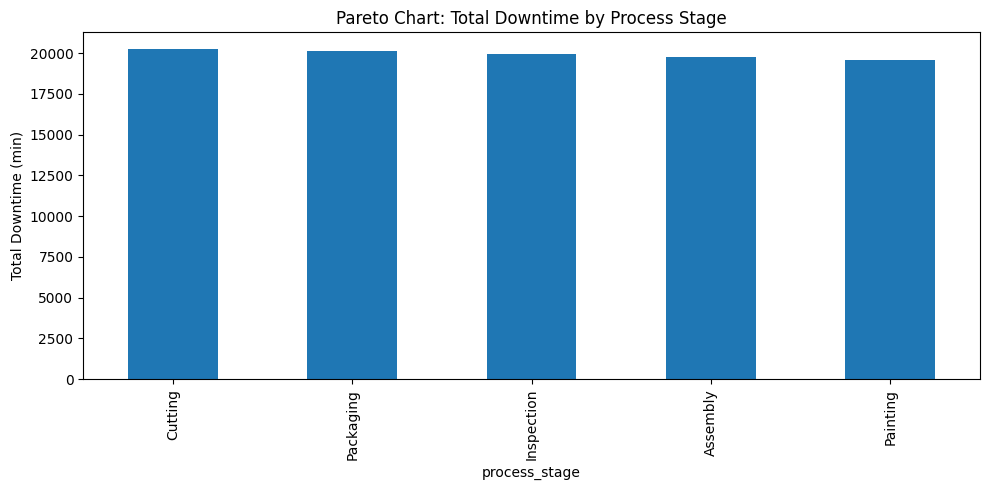

In [7]:
# Step 4: Pareto Analysis on Downtime
stage_downtime = df.groupby('process_stage')['downtime_min'].sum().sort_values(ascending=False)
stage_downtime.cumsum() / stage_downtime.sum()
plt.figure(figsize=(10,5))
stage_downtime.plot(kind='bar')
plt.title("Pareto Chart: Total Downtime by Process Stage")
plt.ylabel("Total Downtime (min)")
plt.tight_layout()
plt.show()

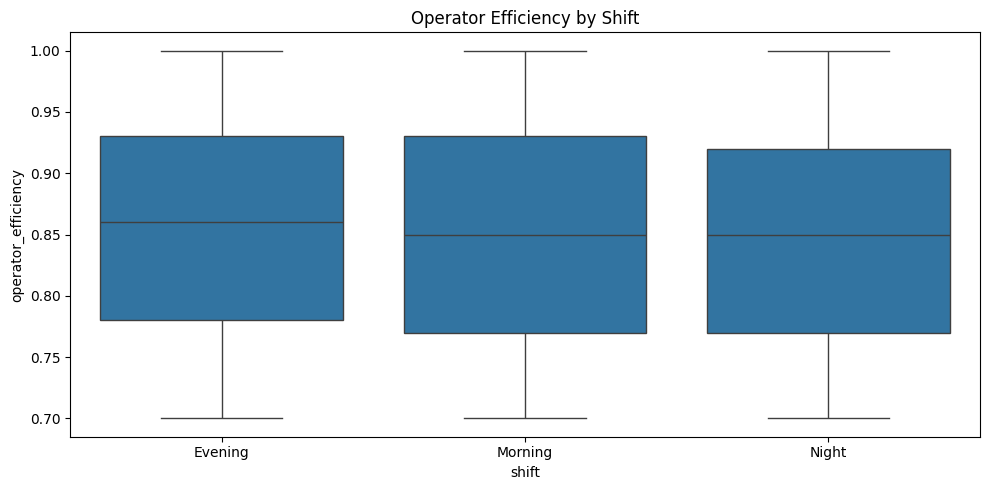

In [8]:
# Step 5: Operator Efficiency Analysis
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='shift', y='operator_efficiency')
plt.title("Operator Efficiency by Shift")
plt.tight_layout()
plt.show()

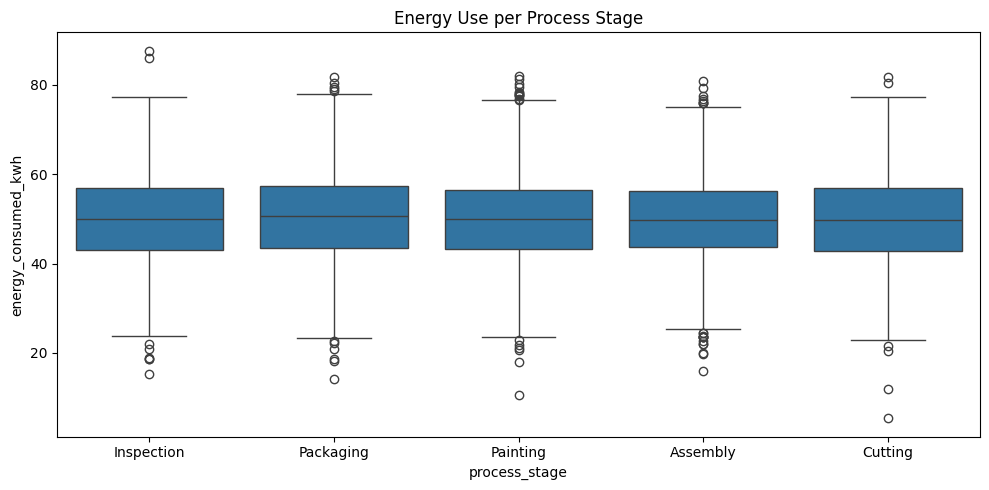

In [9]:
# Step 6: Energy Consumption Analysis
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='process_stage', y='energy_consumed_kwh')
plt.title("Energy Use per Process Stage")
plt.tight_layout()
plt.show()

In [10]:
# Step 7: Simulation – Reduce Downtime by 30% and See Cycle Time Impact
df_sim = df.copy()
df_sim['downtime_min'] = df_sim['downtime_min'] * 0.7
df_sim['simulated_cycle_time'] = df_sim['cycle_time_sec'] - (df_sim['downtime_min'] * 10)
print("\n--- Simulated Cycle Time Reduction Summary ---")
print(df[['cycle_time_sec']].mean(), df_sim[['simulated_cycle_time']].mean())


--- Simulated Cycle Time Reduction Summary ---
cycle_time_sec    300.237117
dtype: float64 simulated_cycle_time    230.478407
dtype: float64


In [11]:
# Step 8: Real-Time Alert Simulation (e.g., for live dashboard)
df['delay_flag'] = ((df['cycle_time_sec'] > 360) | (df['downtime_min'] > 20)).astype(int)
alerts = df[df['delay_flag'] == 1]
print("\n--- Real-Time Alerts Triggered ---")
print(alerts[['timestamp', 'process_stage', 'machine_id', 'cycle_time_sec', 'downtime_min']].head())


--- Real-Time Alerts Triggered ---
             timestamp process_stage machine_id  cycle_time_sec  downtime_min
0  2022-01-01 00:00:00    Inspection         M2          306.73         26.42
5  2022-01-01 05:00:00      Assembly         M5          312.11         31.53
13 2022-01-01 13:00:00      Assembly         M5          369.13         17.00
25 2022-01-02 01:00:00      Painting         M5          403.07          1.08
27 2022-01-02 03:00:00      Assembly         M2          367.58         20.46


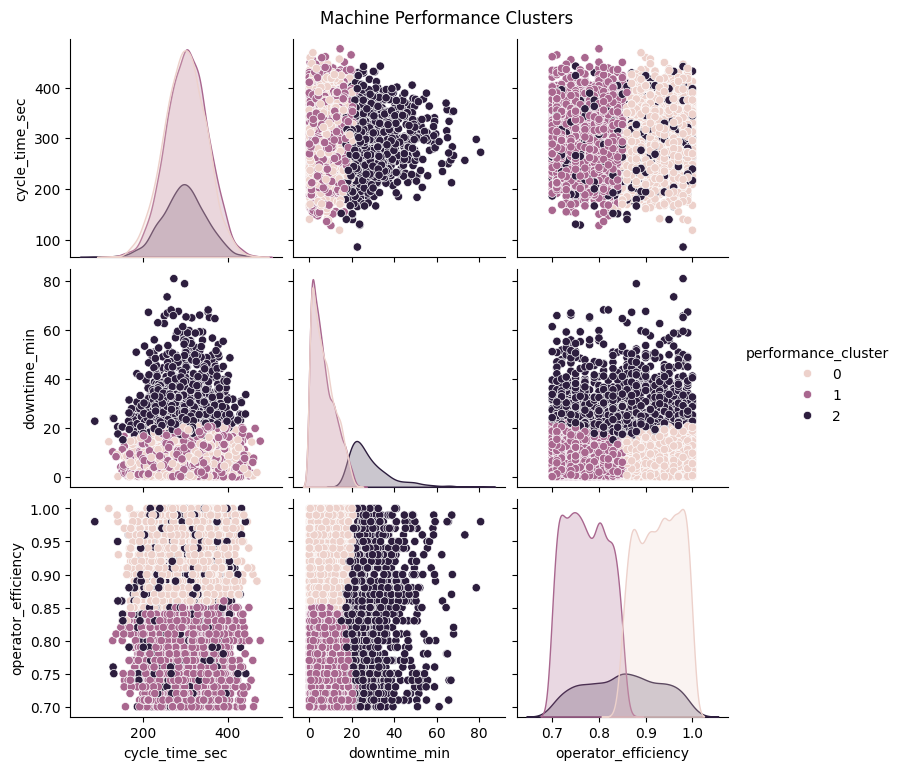

In [14]:
# Step 9: Clustering to Profile Machine Behavior
cluster_df = df[['cycle_time_sec', 'downtime_min', 'defect_rate', 'operator_efficiency', 'energy_consumed_kwh']]
scaler = StandardScaler()
scaled = scaler.fit_transform(cluster_df)

kmeans = KMeans(n_clusters=3, random_state=42)
df['performance_cluster'] = kmeans.fit_predict(scaled)

# Visualize Clusters
sns.pairplot(df, vars=['cycle_time_sec', 'downtime_min', 'operator_efficiency'], hue='performance_cluster')
plt.suptitle("Machine Performance Clusters", y=1.02)
plt.show()

In [15]:
# Step 10: Executive Summary
print("\n--- Executive Summary ---")
print("Main Bottleneck Stage:", bottlenecks.index[0])
print("Most Downtime (Pareto):\n", stage_downtime.head(3))
print("Average Efficiency by Shift:\n", df.groupby('shift')['operator_efficiency'].mean())
print("Total Delay Alerts Triggered:", alerts.shape[0])


--- Executive Summary ---
Main Bottleneck Stage: Assembly
Most Downtime (Pareto):
 process_stage
Cutting       20257.45
Packaging     20155.07
Inspection    19920.34
Name: downtime_min, dtype: float64
Average Efficiency by Shift:
 shift
Evening    0.852313
Morning    0.850433
Night      0.847534
Name: operator_efficiency, dtype: float64
Total Delay Alerts Triggered: 2318
